# Initialization

Interactive use of the `scqubits` library from a jupyter notebook starts with importing the `scqubits` library. Additional imports, e.g.,  `numpy` and the QuTiP library are optional.

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import scqubits as qubit
import scqubits.utils.plotting as plot
from scqubits.utils.spectrum_utils import extract_phase, order_eigensystem

import numpy as np
from qutip import *

# Flux Qubit

$H_\text{flux}=(n_{i}-n_{gi})4(E_\text{C})_{ij}(n_{j}-n_{gj})
                -E_{J}\cos\phi_{1}-E_{J}\cos\phi_{2}-\alpha E_{J}\cos(2\pi f + \phi_{1} - \phi_{2}), \; i,j\in\{1,2\}$

In [13]:
# parameters for the flux qubit
RATIO = 60.0
ALPHA = 0.8

flux_qubit = qubit.FluxQubit(
    EJ1 = 1.0, 
    EJ2 = 1.0, 
    EJ3 = ALPHA*1.0, 
    ECJ1 = 1.0/RATIO, 
    ECJ2 = 1.0/RATIO, 
    ECJ3 = 1.0/ALPHA/RATIO, 
    ECg1 = 50.0/RATIO, 
    ECg2 = 50.0/RATIO, 
    ng1 = 0.0, 
    ng2 = 0.0, 
    flux = 0.45, 
    ncut = 10,
)

In [14]:
flux_qubit

flux qubit
 ———— PARAMETERS ————
ng2	: 0.0
EJ1	: 1.0
ECJ1	: 0.016666666666666666
EJ2	: 1.0
EJ3	: 0.8
ECJ2	: 0.016666666666666666
ng1	: 0.0
ECg2	: 0.8333333333333334
flux	: 0.45
ECg1	: 0.8333333333333334
ECJ3	: 0.020833333333333332
ncut	: 10
truncated_dim	: None
Hilbert space dimension	: 441

### Potential energy for flux qubit

(<Figure size 288x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6dbcf18860>)

/home/dkweiss/anaconda3/envs/venv/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


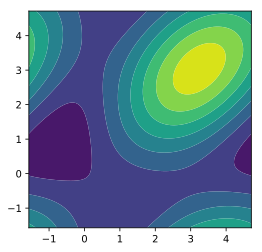

In [4]:
flux_qubit.plot_potential()

### Eigenenergies

In [9]:
evals, evecs = flux_qubit.eigensys()

In [10]:
phase = extract_phase(evecs.T[3])
evec3 = np.exp(-1j*phase)*evecs.T[3]

In [11]:
evec3

array([ 4.11828514e-15+3.19203577e-30j,  5.78962906e-14-2.72004641e-15j,
        7.33952749e-13-8.18370979e-14j,  7.95699479e-12-1.20907451e-12j,
        7.24374460e-11-9.38555136e-12j,  5.31777327e-10+2.13450026e-12j,
        2.91375822e-09+9.50373788e-10j,  9.96227605e-09+1.12992660e-08j,
        6.10670370e-09+6.73015788e-08j, -1.27065625e-07+2.00365949e-07j,
       -6.37047424e-07+9.70557072e-08j, -1.19259126e-06-1.17279776e-06j,
        5.13068816e-07-3.23073793e-06j,  5.75309136e-06-1.38723539e-06j,
        4.59397438e-06+6.72155287e-06j, -6.56781426e-06+6.26203360e-06j,
       -5.54816621e-06-4.20308219e-06j,  1.95914869e-06-3.68267073e-06j,
        1.77081349e-06+4.71711975e-07j,  2.68163774e-08+6.54583031e-07j,
       -1.63461763e-07+8.04681219e-08j,  5.78981307e-14+2.71696787e-15j,
        7.88820398e-13+5.20417043e-18j,  9.65236224e-12-8.86195522e-13j,
        1.01799846e-10-1.90966795e-11j,  9.17676907e-10-2.20029686e-10j,
        6.86713031e-09-1.29829262e-09j,  4.01640713

In [6]:
evals

array([-1.39408879, -1.16358534, -1.11509225, -0.98817209, -0.94604519,
       -0.88385204])


[====================] 100% Done.


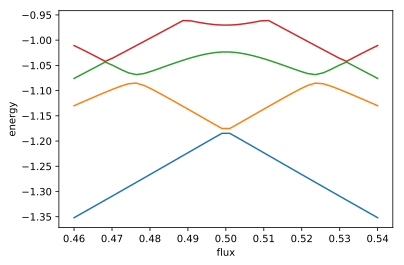

CPU times: user 8.93 s, sys: 400 ms, total: 9.33 s
Wall time: 1.61 s


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f077bf288d0>)

In [7]:
flux_list = np.linspace(.46, .54, 40)
%time flux_qubit.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False,)

In [8]:
flux_qubit.matrixelement_table('n_1_operator', esys=None, evals_count=16)

array([[ 1.11958672e-15+3.46944695e-18j,  2.02903917e-15+1.04375810e+00j,
         7.21265604e-01-1.66672966e-15j, -2.15293349e-15-2.04477138e-01j,
         1.95187864e-16-1.26173334e-01j,  1.56042037e-01+1.44154025e-15j,
        -6.42902767e-16-1.28111133e-01j,  2.67375280e-16-9.60599265e-02j,
         2.90161242e-16-1.64807833e-02j,  3.24665495e-03+2.54035564e-16j,
         5.64890441e-03+2.78217913e-16j,  5.75636965e-16+7.47481281e-04j,
        -3.04472089e-03-9.84809928e-16j, -5.76032797e-17-1.02483330e-03j,
         3.49622670e-04-1.63721250e-16j,  2.66570912e-16+6.50521789e-03j],
       [ 2.02903917e-15-1.04375810e+00j, -6.40330300e-16-0.00000000e+00j,
        -3.43627528e-02+4.12524604e-15j, -6.21816065e-16+1.00299316e+00j,
         1.03373242e-14+7.92102952e-01j,  7.00773432e-01-3.65423813e-15j,
         1.66965981e-15+1.05803691e-02j,  3.29314780e-15+5.30744064e-01j,
         1.67321615e-15+2.44352717e-01j, -1.69185235e-02-3.64773939e-15j,
        -2.38358490e-01+3.58295177e-1

### Eigenfunctions

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8cc1eee10>)

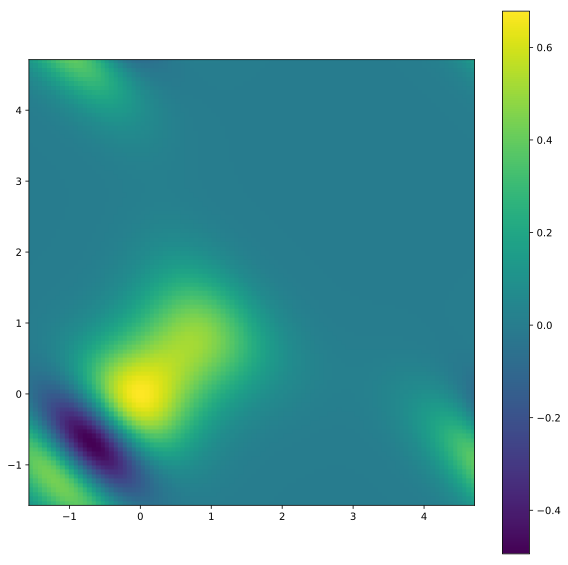

In [9]:
esys = flux_qubit.eigensys()
flux_qubit.plot_wavefunction(esys, which=3, mode='real')

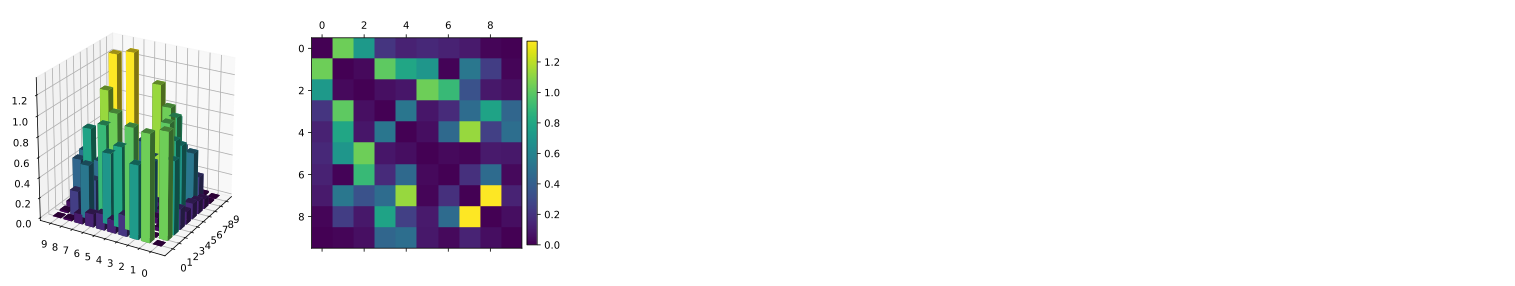

(<Figure size 720x360 with 3 Axes>,
 (<matplotlib.axes._subplots.Axes3DSubplot at 0x7f6dbb8566d8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f6db0354208>))

In [15]:
flux_qubit.plot_matrixelements('n_1_operator', evals_count=10)


[====================] 100% Done.


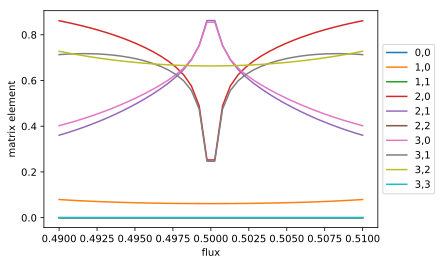

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6db9ee7f60>)

In [20]:
flux_list = np.linspace(.49, .51, 40)
flux_qubit.plot_matelem_vs_paramvals('n_1_operator', 'flux', flux_list)